In [88]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

with fits.open(Path(Path.cwd()) / f"data/HST_JWST/jwst_f277W_crop.fits") as hdu:
    image = hdu[0].data
    header = hdu[0].header

im_wcs = WCS(header)
im_wcs

# WCS Explanation:
# Number of WCS axes: 2 - Two axes represent Right Ascension (RA) and Declination (DEC).
# CTYPE ('RA---TAN', 'DEC--TAN') - RA/DEC celestial coordinates, using a tangential (TAN) projection.
# CRVAL (214.825, 52.825) - World coordinates (in degrees) at the reference pixel.
# CRPIX (7252.5, 3402.5) - Pixel position corresponding to CRVAL.
# PC Matrix (-0.6468, -0.7627, -0.7627, 0.6468) - Describes image rotation/skew relative to the celestial system.
# CDELT (8.33e-06, 8.33e-06) - Pixel scale in degrees (about 0.03 arcseconds per pixel).
# NAXIS (2000, 2000) - Image dimensions in pixels.

Set OBSGEO-B to   -36.849188 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725785823.910 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : np.float64(214.825) np.float64(52.825) 
CRPIX : np.float64(7252.5) np.float64(3402.5) 
PC1_1 PC1_2  : np.float64(-0.64678977951046) np.float64(-0.76266832969569) 
PC2_1 PC2_2  : np.float64(-0.76266832969569) np.float64(0.64678977951046) 
CDELT : np.float64(8.3333333333333e-06) np.float64(8.3333333333333e-06) 
NAXIS : 2000  2000

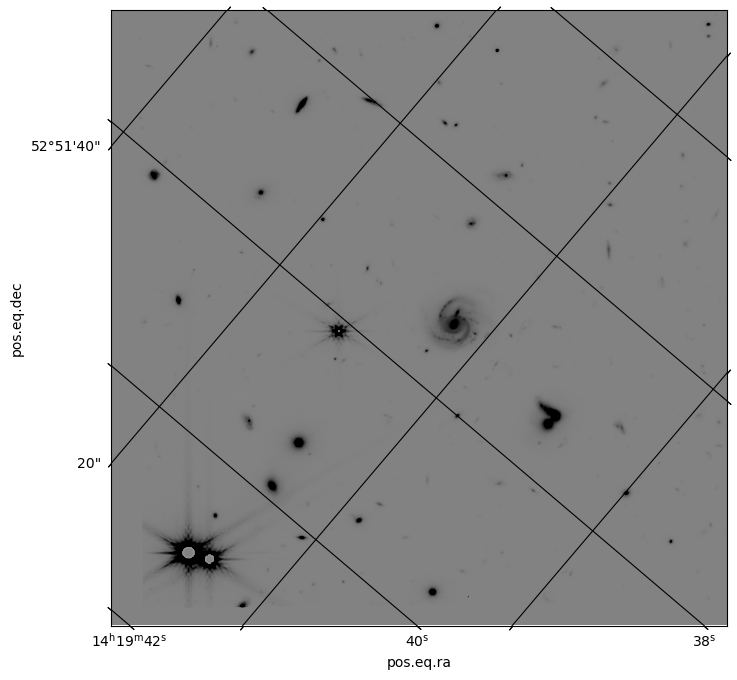

In [89]:
s = 5
vmin = np.mean(image) - s * np.std(image)
vmax = np.mean(image) + s * np.std(image)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": im_wcs})
ax.imshow(image, vmin=vmin, vmax=vmax, cmap="gray_r")
ax.coords.grid(True, color="black")

In [90]:
ax

<WCSAxes: >

(<matplotlib.patches.Circle at 0x2516cba1790>,)

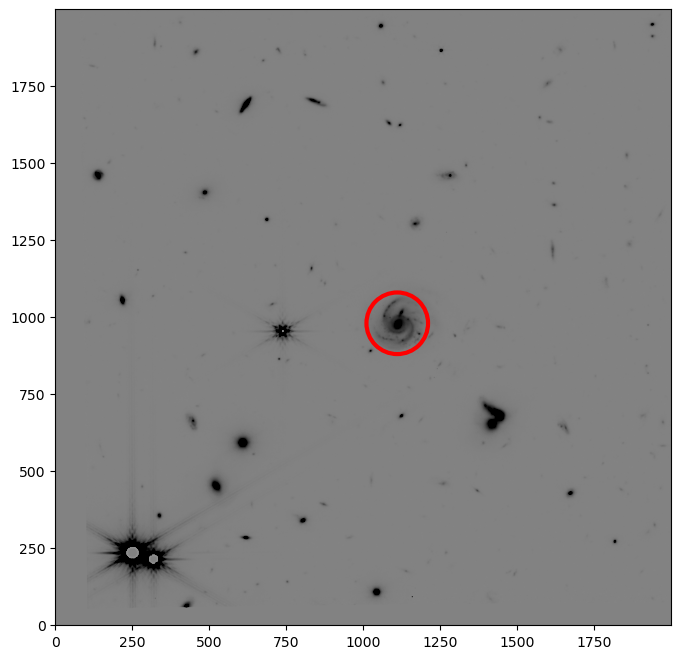

In [91]:
from photutils.aperture import CircularAperture

aperture = CircularAperture([1110, 980], r=100)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, vmin=vmin, vmax=vmax, cmap="gray_r", origin="lower")
aperture.plot(color="r", lw=3)

In [92]:
aperture.to_sky(im_wcs)

<SkyCircularAperture(<SkyCoord (ICRS): (ra, dec) in deg
    (214.9052996, 52.85095396)>, r=2.999998303409702 arcsec)>

In [93]:
coord = aperture.to_sky(im_wcs).positions
coord.to_string("hmsdms")

'14h19m37.27190414s +52d51m03.43427078s'

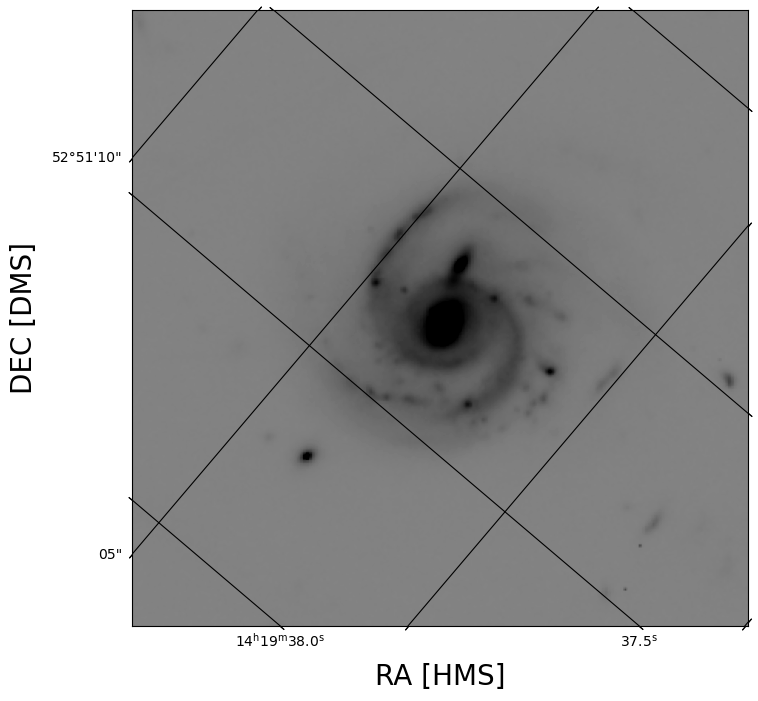

In [94]:
import astropy.units as u
from astropy.nddata import Cutout2D

cutout = Cutout2D(data=image, position=coord, size=12 * u.arcsec, wcs=im_wcs)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": cutout.wcs})
ax.imshow(cutout.data, vmin=vmin, vmax=vmax, cmap="gray_r")
ax.set_xlabel("RA [HMS]", fontsize=20)
ax.set_ylabel("DEC [DMS]", fontsize=20)
ax.grid(color="black")